# Assignment 5.<br>
# Risk.

### Create a Program:

The program should simulate 1000 individual battle rounds in the board game Risk, specifically with 3 attackers vs. 2 defenders.

#### Battle round rules: 
Each battle round involves one roll of dice for both attacker and defender. 
**The highest dice roll from each side is compared:**
If the attacker’s roll is equal to or lower than the defender’s, *the attacker loses one troop*.
If the attacker’s roll is higher, *the defender loses one troop*.
**Compare Second-Highest Dice Rolls**: The same rule. 

#### Plot Results: 
The program should produce a plot summarizing the results of the battle rounds. The specifics of what to plot are left to your discretion.

Extra Challenge: Create a more complex simulation that runs until one side's army is eliminated. This simulation should handle armies of any size and plot the outcome.

This program should model battle outcomes, track results, and create visualizations of the simulated rounds.

In [1]:
# Author Kate Lisovenko

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

Ref.:
[Random Numbers in NumPy](https://www.w3schools.com/python/numpy/numpy_random.asp)<br>
[numpy.random.seed](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.seed.html)


 
I need to create two generators, one for attacker and another for defender. 
**np.random.randint** will generate 2D arrays.<br>
1 and 7 is min and max; size is an array size.<br>


In [2]:
n = 1000 #quantity of raunds
m = 2 #quantity of dices
seed = 2

In [3]:
#Generating dice rolls

#attacker's result:
np.random.seed(seed)
dice_roll_attacker= np.random.randint(1,7, size=(n,m+1))
print(f'Attacker’s turns: first five rows:\n{dice_roll_attacker[0:5,:]}')

#defender's results 
np.random.seed(seed)
dice_roll_defender= np.random.randint(1,7, size=(n,m))
print(f'Defender’s turns: first five rows:\n{dice_roll_defender[0:5,:]}')


Attacker’s turns: first five rows:
[[1 6 1]
 [4 3 4]
 [1 3 2]
 [4 6 3]
 [5 5 5]]
Defender’s turns: first five rows:
[[1 6]
 [1 4]
 [3 4]
 [1 3]
 [2 4]]


Ref.:[NumPy Sorting Arrays](https://www.w3schools.com/python/numpy/numpy_array_sort.asp)

Attacker has 3 dice and I need to take for comparison 2 biggest numbers.<br>
I will sort the array.<br>
**axis=1** for sorting by raws.<br>
**[:, ::-1]** - to invert the order.<br>
expression **::-1** refers to the elements within each row.<br>
This means that we want to select all elements, but in reverse order.

In [4]:
dice_roll_attacker = np.sort(dice_roll_attacker, axis=1 )[:, ::-1]
print(f'Sorted attacker\'s turns. First five rows:\n{dice_roll_attacker[0:5,:]}')

Sorted attacker's turns. First five rows:
[[6 1 1]
 [4 4 3]
 [3 2 1]
 [6 4 3]
 [5 5 5]]


In [5]:
#Now, when it sorted, I can take the rows with bigger numbers.
two_largest_attack= dice_roll_attacker[:,0:2]
print(f'Sorted and filtered attacker\'s turns. first five rows:\n{two_largest_attack[0:5,:]}')

Sorted and filtered attacker's turns. first five rows:
[[6 1]
 [4 4]
 [3 2]
 [6 4]
 [5 5]]


In [6]:
#Sorting defender's turns.
dice_roll_defender = np.sort(dice_roll_defender, axis=1 )[:,::-1]
print(f'Sorted defender\'s turns. First five rows:\n{dice_roll_defender[0:5,:]}')

Sorted defender's turns. First five rows:
[[6 1]
 [4 1]
 [4 3]
 [3 1]
 [4 2]]


Ref.: [Appending to an empty array in NumPy](https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-and-then-append-to-it-in-numpy)

In [7]:
#Now I will compare 2 arrays and create an array with the results.

#Creating an array with zeros.
attaсkers_wins = np.zeros(shape=(n,m),dtype=int)
#attakers_wins

defender_wins = np.zeros(shape=(n,m),dtype=int)
#defender_wins

In [8]:
# n = number of rounds
# i - rows
# j - columns

for i in range (n): # in each row
    for j in range(2): # the loop will check each dice value 'j'
        if dice_roll_defender[i][j] >= dice_roll_attacker[i][j]:# if it is true
            defender_wins[i][j]=1 # zero in the array will be replayced with one
        else:
            
             attaсkers_wins[i][j]=1
print(defender_wins[0:5,:])
print("___________")
print(attaсkers_wins[0:5,:])

[[1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]]
___________
[[0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]]


In [9]:
#summarising results:
 
#axis=1 for summarising rows
sum_defender_wins = np.sum(defender_wins, axis=1)
print(f"The summ of Defender's wins {sum_defender_wins[:10]}")

sum_attaсkers_wins = np.sum(attaсkers_wins,axis=1)
print(f"The summ of Attacker's wins {sum_attaсkers_wins[:10]}")

The summ of Defender's wins [2 1 2 0 0 1 2 2 0 0]
The summ of Attacker's wins [0 1 0 2 2 1 0 0 2 2]


Now I got two 1D arrays with players points for each of 'n' rounds. 
I will join them to get a new array. 

In [10]:
#A new array with player's points
results_defender_attaсker = np.column_stack((sum_defender_wins,sum_attaсkers_wins))
print(results_defender_attaсker)

[[2 0]
 [1 1]
 [2 0]
 ...
 [2 0]
 [1 1]
 [1 1]]


In [11]:
#I turn the array into data frame pandas.

df = pd.DataFrame(results_defender_attaсker, columns=['defender','attacker'])
df['round'] = df.index+1

# set rounds as index
df.set_index('round', inplace=True)
df.head(3)

,defender,attacker
round,,
1,2,0
2,1,1
3,2,0


To plot the results, I need to get some additional data. 
I assume that players change their roles each turn. If it is so, I can mark it in my df.

Ref.:[Constructing an array by repeating](https://numpy.org/doc/stable/reference/generated/numpy.tile.html)


**np.tile** repeat the array ['player_1', 'player_2'] **len(df) // 2 + 1** times<br> 
**len(df)/ 2** because we have 2 players<br> 
**+1** will create additional pair if we have odd numbers of turns(len(df))<br> 
**[:len(df)]** will cut off an excess row

#Ref.: [pandas.DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [12]:
# Adding 2 columns to mark player's roles in the game
df['who_is_attacker'] = np.tile(['player_1', 'player_2'], len(df) // 2 + 1)[:len(df)]
df['who_is_defender'] = np.tile(['player_2', 'player_1'], len(df) // 2 + 1)[:len(df)]

# creating a column with the round results
def who_is_winner(row): 
    if row['defender'] > row['attacker']:
        return row['who_is_defender']
    elif row['defender'] < row['attacker']:
        return row['who_is_attacker']
    else:
        return 'draw'
df['winner'] = df.apply(who_is_winner, axis=1)    

#cheking the df    
df.head()

,defender,attacker,who_is_attacker,who_is_defender,winner
round,,,,,
1,2,0,player_1,player_2,player_2
2,1,1,player_2,player_1,draw
3,2,0,player_1,player_2,player_2
4,0,2,player_2,player_1,player_2
5,0,2,player_1,player_2,player_1


winner
player_2    346
draw        342
player_1    312
Name: count, dtype: int64


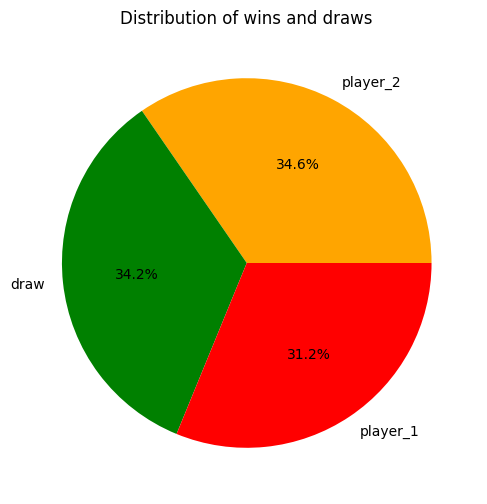

In [13]:
# Pie chart 
#calculating the results
winner_counts = df['winner'].value_counts()
print(winner_counts)

#using autopct='%1.1f%%' for getting the results in % 
plt.figure(figsize=(6, 6))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', colors=['orange', 'green', 'red'])
plt.title("Distribution of wins and draws")
plt.show()
